#### NLP Workshops with AVIVA
#### Dzień 3
#### Feature Engineering and Text Representation - Financial Sentiment Analysis
#### część 2. 

Notebook przedstawia funkcje, które wykonują word embedding tekstu oraz dodają nowe cechy do zbioru danych. Jest to kolejny krok przygotowania danych do zadania predykcji sentymentu.

### Załadowanie bibliotek

In [89]:
import spacy
import pandas as pd
import re
import matplotlib.pyplot as plt
import gensim.models as gensim_models
import numpy as np

In [90]:
import warnings

warnings.filterwarnings("ignore")

### Wczytanie danych 

Dane są outputem z poprzednich zajęć (Text Preprocessing) i zawierają kolumnę "PreprocessedSentence" z wyczyszczonym tekstem z kolumny "Sentence".

In [91]:
data_cleaned = pd.read_csv(
    r"data/FinancialNewsPreprocessed.csv", index_col=0
).reset_index(drop=True)
data_cleaned

,Sentence,PreprocessedSentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,geosolution technology leverage benefon gps so...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi low down to bk real possibility,negative
2,"For the last quarter of 2010 , Componenta 's n...",for last quarter of componenta net sale double...,positive
3,According to the Finnish-Russian Chamber of Co...,accord to finnishrussian chamber of commerce a...,neutral
4,The Swedish buyout firm has sold its remaining...,swedish buyout firm have sell its remain perce...,neutral
...,...,...,...
5650,RISING costs have forced packaging producer Hu...,rise cost have force packaging producer huhtam...,negative
5651,Nordic Walking was first used as a summer trai...,nordic walking be first use as summer training...,neutral
5652,"According shipping company Viking Line , the E...",accord ship company vike line eu decision have...,neutral
5653,"In the building and home improvement trade , s...",building home improvement trade sale decrease ...,neutral


## Word embedding

### Word embedding (metodą word2vec)

Zamierzamy wytrenować nasz model (za pomocą word2vec z biblioteki gensim), a następnie użyć modelu do przedstawienie wyczyszczonego tekstu ("PreprocessedSentence") za pomocą wektora numerycznego.

In [92]:
data_cleaned["PreprocessedSentence"]

0       geosolution technology leverage benefon gps so...
1                     esi low down to bk real possibility
2       for last quarter of componenta net sale double...
3       accord to finnishrussian chamber of commerce a...
4       swedish buyout firm have sell its remain perce...
                              ...                        
5650    rise cost have force packaging producer huhtam...
5651    nordic walking be first use as summer training...
5652    accord ship company vike line eu decision have...
5653    building home improvement trade sale decrease ...
5654    helsinki afx kci konecranes say it have win or...
Name: PreprocessedSentence, Length: 5655, dtype: object

#### Trening modelu word2vec

In [93]:
def train_word2vec_model(
    data: pd.DataFrame, text_column: str
) -> gensim_models.word2vec.Word2Vec:
    """
    Train Word2Vec model using give text columns
    :param data: Pandas DataFrame containing input data with text_column
    :param text_columns: name of column containing text
    :param nlp: spacy model
    :return: Word2Vec model
    """
    list_of_token_vectors = list(
        data[text_column].apply(lambda txt: txt.lower().split())
    )

    model = gensim_models.word2vec.Word2Vec(
        list_of_token_vectors, vector_size=100, window=1, min_count=2
    )

    return model

In [94]:
train_word2vec_model(data_cleaned, "PreprocessedSentence")

#### Word embedding kolumny "PreprocessedSentence"

Word embedding kolumny "PreprocessedSentence" wykonamy za pomocą dwóch funkcji.
Pierwsza z nich będzie wykonywać word embedding dla pojedynczego tekstu. 
Druga zaplikuję tę funkcję do każdego tekstu z procesowanej kolumny.

In [95]:
def word2vec_sentence_embedding_vector(
    model: gensim_models.word2vec.Word2Vec, text: str
) -> list:
    """
    Creates list of 1-dimensional numerical representation of words from text by calculating
    word embedding vectors.
    :param model: Word2Vec model
    :param text: input text
    :return: list of numpy arrays with numerical representation of words
    """

    index2word_set = set(model.wv.index_to_key)

    embedded_word_vectors = [
        model.wv[word.lower()] for word in text.split() if word in index2word_set
    ]

    return embedded_word_vectors

In [96]:
model = train_word2vec_model(data_cleaned, "PreprocessedSentence")
sentence = "greene king third quarter sale boost by festive season"
sentence_embeded = word2vec_sentence_embedding_vector(model, sentence)
sentence_embeded

[array([-0.36853015,  0.35236382, -0.0724097 ,  0.01204012, -0.02667789,
        -0.24691464,  0.15340768,  0.6933577 , -0.25816983, -0.24216652,
         0.02614757, -0.48587984, -0.01975334,  0.04084392,  0.04351875,
        -0.21686982,  0.3848936 , -0.38704795, -0.22602431, -0.44756642,
         0.07878502,  0.13342278,  0.3953795 ,  0.03466317, -0.13978332,
        -0.04846992, -0.13400269, -0.31860745, -0.10336342, -0.04070421,
         0.4256403 , -0.16600919,  0.17655034, -0.19317403, -0.06572178,
         0.47617248,  0.26006067, -0.15104195, -0.18767092, -0.43074057,
         0.21480359, -0.33228296, -0.17507267, -0.04259763,  0.30268082,
        -0.14045128, -0.05927179, -0.17729037,  0.05497475,  0.08691311,
         0.10246079, -0.06143516, -0.07158373, -0.02583752, -0.15520778,
        -0.08180055,  0.22536427, -0.0487101 , -0.27364552, -0.21587445,
         0.18379416,  0.21853022,  0.13308632, -0.25025937, -0.25916368,
         0.09429803,  0.18020955,  0.38986075, -0.5

In [97]:
print(f"Number of words in sentence: {len(sentence.split())}")
print(f"Number of arrays in list of words embeddings: {len(sentence_embeded)}")
print(f"Shape of first word embedding: {sentence_embeded[0].shape}")
print(f"Shape of second word embedding: {sentence_embeded[0].shape}")

Number of words in sentence: 9
Number of arrays in list of words embeddings: 6
Shape of first word embedding: (100,)
Shape of second word embedding: (100,)


Zauważmy, że jeśli spróbujemy wykonać tę funkcję dla tekstu zawierającego słowa, którego 
nie ma w naszym oryginalnym tekście lub występują one rzadko (mniej niż 2 razy), to otrzymamy
w rezultacie pustą listę.

In [98]:
model = train_word2vec_model(data_cleaned, "PreprocessedSentence")
sentence = "ASEC"
sentence_embeded = word2vec_sentence_embedding_vector(model, sentence)
sentence_embeded

[]

In [99]:
def word2vec_average_sentence_embedding_vector(embedded_word_vectors: list) -> np.array:
    """
    Calculate average of word embedding vectors given by a list.
    :param embedded_word_vectors: list of numpy arrays
    :return: numpy array with numerical representation of text
    """

    if len(embedded_word_vectors) == 0:
        return np.zeros(model.wv.vector_size)

    embedded_sentence_vectors = np.mean(embedded_word_vectors, axis=0)

    return embedded_sentence_vectors

In [100]:
model = train_word2vec_model(data_cleaned, "PreprocessedSentence")
sentence = "greene king third quarter sale boost by festive season"
sentence_embeded = word2vec_sentence_embedding_vector(model, sentence)
average_sentence_embeded = word2vec_average_sentence_embedding_vector(sentence_embeded)
average_sentence_embeded

array([-3.12512010e-01,  3.00418735e-01,  1.61534909e-03,  6.67325035e-02,
        6.52348772e-02, -3.11596066e-01,  1.16229445e-01,  5.98536551e-01,
       -1.81272209e-01, -1.67443812e-01, -9.51313376e-02, -3.89733076e-01,
       -6.73140660e-02,  3.06157917e-02,  2.86933277e-02, -1.72524646e-01,
        3.10577869e-01, -2.56387025e-01, -1.55516252e-01, -4.85069871e-01,
        8.92427489e-02,  1.00376435e-01,  3.36894423e-01,  2.51116138e-02,
       -5.83893955e-02,  9.39394441e-03, -1.90380499e-01, -1.74240157e-01,
       -1.19622953e-01,  8.68519545e-02,  3.88796300e-01, -9.93046686e-02,
        2.01567307e-01, -2.91464537e-01, -1.34435579e-01,  3.53736848e-01,
        1.56670496e-01, -1.60059527e-01, -1.56833306e-01, -3.53191584e-01,
        1.18920110e-01, -2.76067406e-01, -1.13586694e-01, -6.81242719e-02,
        2.03628913e-01, -1.30051330e-01, -7.46834725e-02, -1.86736226e-01,
        1.35052189e-01,  1.25662699e-01,  1.08709306e-01, -1.79161906e-01,
       -1.12701297e-01, -

In [101]:
average_sentence_embeded.shape

(100,)

In [102]:
model = train_word2vec_model(data_cleaned, "PreprocessedSentence")
sentence = "ASEC"
sentence_embeded = word2vec_sentence_embedding_vector(model, sentence)
average_sentence_embeded = word2vec_average_sentence_embedding_vector(sentence_embeded)
average_sentence_embeded

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [103]:
average_sentence_embeded.shape

(100,)

In [104]:
def word2vec_embedding(
    data: pd.DataFrame, text_column: str, columns_to_include: list
) -> pd.DataFrame:
    """
    Creates numerical representation of text using word2vec method.
    :param data: Pandas DataFrame containing input data with text_column
    :param text_columns: name of column containing text
    :param columns_to_include: list of columns from data
    :param nlp: spacy model
    :return: Pandas DataFrame containing numeric values representing text
    """

    model = train_word2vec_model(data, text_column)

    words_embedding = data[text_column].apply(
        lambda x: word2vec_sentence_embedding_vector(model, x)
    )

    avg_word_embedding = words_embedding.apply(
        lambda x: word2vec_average_sentence_embedding_vector(x)
    )

    avg_word_embedding = pd.DataFrame(list(avg_word_embedding))

    avg_word_embedding[columns_to_include] = data[columns_to_include]

    return avg_word_embedding

In [105]:
word2vec_embedding(
    data_cleaned,
    "PreprocessedSentence",
    ["Sentence", "PreprocessedSentence", "Sentiment"],
)

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,Sentence,PreprocessedSentence,Sentiment
0,-0.040625,0.087136,0.067266,0.046262,0.078263,-0.243150,0.064683,0.368829,-0.146645,-0.075050,...,0.028611,0.272720,0.164836,0.139689,-0.153502,-0.000126,0.011637,The GeoSolutions technology will leverage Bene...,geosolution technology leverage benefon gps so...,positive
1,-0.225617,0.261480,0.035816,0.032965,0.072722,-0.280816,0.145685,0.516328,-0.190780,-0.153835,...,-0.046661,0.431484,0.212971,0.169740,-0.158268,-0.019461,-0.078061,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi low down to bk real possibility,negative
2,-0.364623,0.394738,-0.002986,0.012584,0.086849,-0.420043,0.185253,0.776124,-0.258441,-0.209364,...,-0.123437,0.611906,0.277517,0.227010,-0.212650,-0.027447,-0.071698,"For the last quarter of 2010 , Componenta 's n...",for last quarter of componenta net sale double...,positive
3,-0.163038,0.220772,0.060794,0.052370,0.104624,-0.388309,0.140746,0.653089,-0.247980,-0.151458,...,0.000512,0.506338,0.274160,0.210966,-0.234293,-0.013913,-0.037355,According to the Finnish-Russian Chamber of Co...,accord to finnishrussian chamber of commerce a...,neutral
4,-0.091347,0.157035,0.095318,0.071013,0.120814,-0.387117,0.114392,0.591992,-0.232593,-0.128197,...,0.034053,0.446582,0.262284,0.222033,-0.230895,-0.003165,0.013724,The Swedish buyout firm has sold its remaining...,swedish buyout firm have sell its remain perce...,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5650,-0.118664,0.165812,0.076638,0.053511,0.099012,-0.333587,0.109150,0.528949,-0.197014,-0.122734,...,0.009778,0.403491,0.225654,0.186747,-0.195344,-0.005676,-0.007406,RISING costs have forced packaging producer Hu...,rise cost have force packaging producer huhtam...,negative
5651,-0.114087,0.172601,0.059252,0.030403,0.068985,-0.305074,0.097737,0.506558,-0.201588,-0.130372,...,0.005065,0.384070,0.213688,0.170447,-0.179841,-0.008267,-0.024083,Nordic Walking was first used as a summer trai...,nordic walking be first use as summer training...,neutral
5652,-0.042611,0.099584,0.093616,0.065170,0.099422,-0.312232,0.089169,0.461148,-0.186181,-0.098571,...,0.046399,0.345441,0.212847,0.181333,-0.196751,0.000755,0.014100,"According shipping company Viking Line , the E...",accord ship company vike line eu decision have...,neutral
5653,-0.413698,0.434699,0.023922,0.018454,0.100514,-0.442569,0.216733,0.793723,-0.267894,-0.235164,...,-0.123209,0.660712,0.304700,0.261699,-0.223767,-0.024530,-0.111795,"In the building and home improvement trade , s...",building home improvement trade sale decrease ...,neutral


In [106]:
temp = word2vec_embedding(
    data_cleaned,
    "PreprocessedSentence",
    ["Sentence", "PreprocessedSentence", "Sentiment"],
)

In [107]:
temp["Sentiment"].isna().sum()

0

### Word embedding (metodą spacy)

Zastosujemy też drugą metodę word emebdding, korzystając z biblioteki spacy. 
W tym przypadku nie będziemy musieli trenować modelu na naszych danych. 
Będziemy korzystać z gotowego, wytrenowanego modelu spacy ("en_core_web_sm").

In [108]:
def spacy_embedding(
    data: pd.DataFrame, text_column: str, columns_to_include: list, nlp
) -> pd.DataFrame:
    """
    Creates numerical representation of text using spacy.
    :param data: Pandas DataFrame containing input data with 'text_column'
    :param text_columns: name of column containing text
    :param columns_to_include: list of columns from data
    :return: Pandas DataFrame containing numeric values representing text
    """

    # 96 is length of normal nlp pipe vector
    embedded_text = [
        doc.vector if doc else [0] * 96 for doc in nlp.pipe(data[text_column])
    ]

    embedded_text = pd.DataFrame(embedded_text)

    embedded_text[columns_to_include] = data[columns_to_include]

    return embedded_text

In [109]:
nlp = spacy.load("en_core_web_sm")
spacy_embedding(
    data_cleaned,
    "PreprocessedSentence",
    ["Sentence", "PreprocessedSentence", "Sentiment"],
    nlp,
)

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,Sentence,PreprocessedSentence,Sentiment
0,0.133433,0.871901,0.365697,-0.256001,0.373527,-0.271523,0.000461,0.092298,-0.195847,0.058545,...,-0.355532,-0.095407,-0.211593,0.411392,0.543314,-0.259041,-0.269538,The GeoSolutions technology will leverage Bene...,geosolution technology leverage benefon gps so...,positive
1,0.512263,-0.024583,-0.273538,-0.326263,0.391909,-0.244203,-0.302843,-0.198969,0.196050,-0.088305,...,0.254506,0.201047,0.574924,-0.229513,0.403106,0.615872,0.149026,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi low down to bk real possibility,negative
2,0.048958,0.379891,-0.046013,0.446819,0.181975,-0.155599,-0.232785,-0.095827,0.312827,-0.127036,...,0.052061,0.017183,0.392866,0.052592,0.118632,0.117212,0.192037,"For the last quarter of 2010 , Componenta 's n...",for last quarter of componenta net sale double...,positive
3,0.060623,0.530929,-0.070979,-0.148892,0.331757,-0.179980,-0.083385,-0.172724,0.183011,-0.064152,...,0.141741,-0.178245,0.095900,0.129976,0.214867,-0.168137,0.446573,According to the Finnish-Russian Chamber of Co...,accord to finnishrussian chamber of commerce a...,neutral
4,0.414564,0.390580,0.319709,-0.144357,0.371756,-0.005248,-0.189107,0.019231,-0.186268,-0.280523,...,0.206065,-0.285921,0.233735,0.507143,0.403567,-0.067975,0.082859,The Swedish buyout firm has sold its remaining...,swedish buyout firm have sell its remain perce...,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5650,0.167240,0.494416,0.215750,-0.187437,0.309543,-0.263484,-0.162785,0.001064,-0.140270,0.224002,...,-0.286249,-0.368833,-0.039826,0.253599,0.520451,-0.163263,0.229102,RISING costs have forced packaging producer Hu...,rise cost have force packaging producer huhtam...,negative
5651,0.174835,0.544702,0.083809,0.007023,0.157002,-0.197217,-0.165313,0.067592,-0.020151,0.180104,...,-0.060736,-0.287198,0.174852,0.522692,0.606279,0.012643,-0.069499,Nordic Walking was first used as a summer trai...,nordic walking be first use as summer training...,neutral
5652,0.318092,0.525883,0.349870,-0.214352,0.074195,-0.046369,-0.232579,0.326056,0.101335,0.293083,...,0.265245,0.020697,-0.116310,0.249787,0.325964,-0.049185,-0.149849,"According shipping company Viking Line , the E...",accord ship company vike line eu decision have...,neutral
5653,0.372301,0.409345,0.083437,0.426213,0.189056,-0.838700,-0.179591,-0.109170,-0.459727,0.101312,...,0.039575,-0.315428,-0.162449,0.195550,0.271204,-0.259681,0.111222,"In the building and home improvement trade , s...",building home improvement trade sale decrease ...,neutral


## Part-of-speech tagging

W dalszej części zajęć będziemy korzystać wielokrotnie korzystać modelu spacy "en_core_web_sm":

In [110]:
nlp = spacy.load("en_core_web_sm")

Przykłady part-of-speech tagging z wykorzystaniem spacy:

In [111]:
sentence = "The bear is a majestic animal"
doc = nlp(sentence)
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

The DET det bear
bear NOUN nsubj is
is AUX ROOT is
a DET det animal
majestic ADJ amod animal
animal NOUN attr is


Skróty opisujące części mowy i relacje między słowami w zdaniu można szybko sprawdzić
za pomocą funkcji `spacy.explain()`.

In [112]:
spacy.explain("ADJ")

'adjective'

In [113]:
spacy.explain("nsubj")

'nominal subject'

Part-of-speech tagging możemy użyć między innymi do EDA (Exploratory Data Analysis). 
My także użyjemy je w ramach EDA. Sprawdzimy najczęściej występujące czasowniki
 dla każdego rodzaju sentymentu. Dzięki temu sprawdzimy, czy są istotne 
różnice w tekstach dla poszczególnych sentymentów, które wyrazy pojawiają się równie 
często w każdym z nich itd.

In [114]:
def find_verb_in_text(text: str, nlp) -> list[str]:
    """
    Finds "VERBS" in text using spacy POS.
    :param text: input text
    :pos_to_find: part of speech
    :param nlp: spacy model
    :return: list of pos found in text
    """
    doc = nlp(text)

    found_pos = [token.lemma_.lower() for token in doc if token.pos_ == "VERB"]

    return found_pos

In [115]:
sentence = "circulation revenue have increase by in finland and in sweden in"

In [116]:
find_verb_in_text(sentence, nlp)

['increase']

In [117]:
def create_barplots_for_pos(data: pd.DataFrame, text_column: str, nlp):
    """
    Creates bar plots for the 10 most common verbs for each sentiment.
    :param data: Pandas DataFrame containing data with text_column
    :param text_column: name of column containing text
    :param nlp: spacy model
    """
    positive_list = find_verb_in_text(
        data[data["Sentiment"] == "positive"][text_column].to_string(), nlp
    )
    negative_list = find_verb_in_text(
        data[data["Sentiment"] == "negative"][text_column].to_string(), nlp
    )
    neutral_list = find_verb_in_text(
        data[data["Sentiment"] == "neutral"][text_column].to_string(), nlp
    )

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle("Most frequent VERBS")
    pd.Series(positive_list).value_counts()[:10].plot.bar(ax=ax[0])
    ax[0].set_title("Positive")
    pd.Series(negative_list).value_counts()[:10].plot.bar(ax=ax[1])
    ax[1].set_title("Negative")
    pd.Series(neutral_list).value_counts()[:10].plot.bar(ax=ax[2])
    ax[2].set_title("Neutral")

    plt.show()

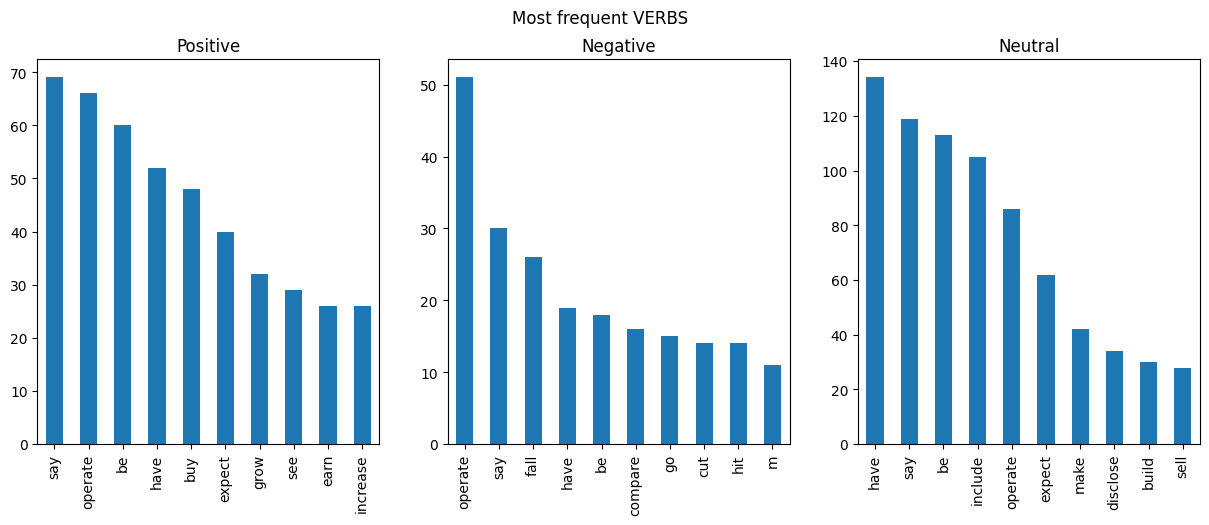

In [118]:
create_barplots_for_pos(data_cleaned, "PreprocessedSentence", nlp)

## Named Entity Recognition

Przykłady named entity recognition z wykorzystaniem spacy:

In [119]:
sentence = "Apple is looking at buying U.K. startup for $1 billion"
doc = nlp(sentence)
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


Skróty opisujące NER także możemy sprawdzić
za pomocą funkcji `spacy.explain()`.

In [120]:
spacy.explain("GPE")

'Countries, cities, states'

Napiszemy teraz funkcje, które pozwolą na wyszukanie ludzi (imion i nazwisk), 
nazw organizacji oraz cen.

Skorzystamy z nieoczyszczonej kolumny "Sentence". Oczyszczona kolumna nie zawiera wielkich
liter, stop words, liczb oraz znaków interpunkcyjnych, co sprawi, 
że spacy nie będzie wyszukiwał tak efektywnie NER, jakby mógł - np. wyszukanie
cen byłoby niemożliwe. 

Jednak w pierwszym etapie naszej funkcji wykonamy na kolumnie "Sentence" bardzo 
proste czyszczenie - usuniemy wielokrotne spacje. Zdarzają sie one w oryginalnym tekście,
co z kolei już może być utrudnieniem dla modelu spacy.

### Prices

In [121]:
def find_prices_in_text_initially(text: str, nlp) -> list[str]:
    """
    Finds organizations in text using spacy Named Entity Recognition (NER).
    :param text: input text
    :param nlp: spacy model
    :return: list of organizations found in text
    """
    text_cleaned = re.sub(r"\s+", " ", text).strip()

    doc = nlp(text_cleaned)

    found_prices = [entity.lemma_ for entity in doc.ents if entity.label_ == "MONEY"]

    found_prices_unique = list(set(found_prices))

    return found_prices_unique

In [122]:
sentence = "Shell's $70 Billion BG Deal Meets Shareholder Skepticism"
find_prices_in_text_initially(sentence, nlp)

['$70 billion']

In [123]:
data_cleaned["PricesInitially"] = data_cleaned["Sentence"].apply(
    lambda x: find_prices_in_text_initially(x, nlp)
)

In [124]:
data_cleaned[["Sentence", "PricesInitially"]]

,Sentence,PricesInitially
0,The GeoSolutions technology will leverage Bene...,[]
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...","[2.50, 1.50]"
2,"For the last quarter of 2010 , Componenta 's n...",[]
3,According to the Finnish-Russian Chamber of Co...,[]
4,The Swedish buyout firm has sold its remaining...,[]
...,...,...
5650,RISING costs have forced packaging producer Hu...,[]
5651,Nordic Walking was first used as a summer trai...,[]
5652,"According shipping company Viking Line , the E...",[]
5653,"In the building and home improvement trade , s...",[]


Niestety spacy nie zawsze przypisuje poprawnie etykiety NER. Dzieje się tak, dlatego
że przypisywanie tych etykiet jest ściśle uzależnione od przykładów, na których 
model, z którego korzystamy, uczył się. Dlatego też czasami konieczne są dodatkowe kroki, 
np. wyselekcjonowanie poprawnych etykiet NER.

Żeby wiedzieć, co należy poprawić w funkcji wyszukującej ceny, przyjrzymy się poprawnym i błędym klasyfikacjom cen.

Przykład poprawnego działa funkcji `find_prices_in_text_initially()`:

In [125]:
sentence = "$ESI on lows, down $1.50 to $2.50 BK a real possibility"
find_prices_in_text_initially(sentence, nlp)

['2.50', '1.50']

In [126]:
sentence = (
    "Fastenal misses by $0.01, misses on revenue $FAST #NYSE https://t.co/63JHQ7pwMN"
)
find_prices_in_text_initially(sentence, nlp)

['0.01']

In [127]:
sentence = "A purchase agreement for 7,200 tons of gasoline with delivery at the Hamina terminal , Finland , was signed with Neste Oil OYj at the average Platts index for this September plus eight US dollars per month ."
find_prices_in_text_initially(sentence, nlp)

['eight US dollar']

In [128]:
sentence = "The latest result included per-share charges of 5 cents for stock compensation , 1 cent for research and development and 1 cent for strategic investments ."
find_prices_in_text_initially(sentence, nlp)

['1 cent', '5 cent']

Jednak istnieją teksty, dla których nasza funkcja
niepoprawnie znajduje waluty, ceny itp. Czasami też nie wyszukuje wszystkich cen.

In [129]:
sentence = "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m ."
find_prices_in_text_initially(sentence, nlp)

[]

In [130]:
sentence = "Most bullish stocks on Twitter during this dip. $YHOO $GDX $GOOGL $STZ $GOLD $EW $VZ $CELG $SBUX $SCTY more: https://t.co/iuZJelfwt3"
find_prices_in_text_initially(sentence, nlp)

['$vz $CELG', '$SBUX $', '$YHOO $GDX', '$STZ']

In [131]:
sentence = "$TSLA Recalls 2,700 Model X Vehicles; Shares Volatile https://t.co/tcKqZnMIqX #TSLA #tech #stockmarket https://t.co/FeMhJtAmQj"
find_prices_in_text_initially(sentence, nlp)

['#tech #']

In [132]:
sentence = "loading $SPY and $AAPL puts. think were toppy IMHO."
find_prices_in_text_initially(sentence, nlp)

['AAPL']

Zauważyliśmy, że spacy indentyfikuje jako "MONEY" wyrażenia zaczynające się od znaku "$" po których następuje
ciąg liter - takie wyrażenia usuniemy w nowej wersji funkcji. 
Spacy często też nie wyszukuje walut, które rozpoczynają się od "EUR" lub "USD" następnie występuje wartość liczbowa (zapisana cyframi)
oraz liczba zapisana słownie, za pomocą skrótu lub pełnego wyrazu, np. "EUR76m" lub "USD 12.4 billion". 
Dlatego dopiszemy też fragment kodu, który takie ceny będzie również wychwytywał.

In [133]:
def find_prices_in_text(text: str, nlp) -> list[str]:
    """
    Finds organizations in text using spacy Named Entity Recognition (NER).
    :param text: input text
    :param nlp: spacy model
    :return: list of organizations found in text
    """
    text_cleaned = re.sub(r"\s+", " ", text).strip()

    doc = nlp(text_cleaned)

    spacy_found_prices = [
        entity.lemma_ for entity in doc.ents if entity.label_ == "MONEY"
    ]

    incorrect_price_pattern = r"\$\s?[a-zA-Z]+"
    spacy_found_prices = [
        price
        for price in spacy_found_prices
        if not re.search(incorrect_price_pattern, price)
    ]
    price_pattern = r"(?:EUR|USD)\s?\d+\s?[\.,]?\d*\s?(?:million|mn|m|billion|bn)?"
    price_pattern_matches = re.findall(price_pattern, text)

    found_prices = spacy_found_prices + price_pattern_matches
    found_prices_unique = list(set(found_prices))

    return found_prices_unique

In [134]:
data_cleaned["Prices"] = data_cleaned["Sentence"].apply(
    lambda x: find_prices_in_text(x, nlp)
)

In [135]:
data_cleaned[["Sentence", "PricesInitially", "Prices"]]

,Sentence,PricesInitially,Prices
0,The GeoSolutions technology will leverage Bene...,[],[]
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...","[2.50, 1.50]","[2.50, 1.50]"
2,"For the last quarter of 2010 , Componenta 's n...",[],"[EUR76m, EUR131m, EUR7m]"
3,According to the Finnish-Russian Chamber of Co...,[],[]
4,The Swedish buyout firm has sold its remaining...,[],[]
...,...,...,...
5650,RISING costs have forced packaging producer Hu...,[],[]
5651,Nordic Walking was first used as a summer trai...,[],[]
5652,"According shipping company Viking Line , the E...",[],[]
5653,"In the building and home improvement trade , s...",[],[EUR 201.4 mn]


### People

In [136]:
def find_people_in_text_initially(text: str, nlp) -> list[str]:
    """
    Finds people in text using Named Entity Recognition (NER).
    :param text: input text
    :param nlp: spacy model
    :return: list of people found in text
    """
    text_cleaned = re.sub(r"\s+", " ", text).strip()

    doc = nlp(text_cleaned)

    founds_persons = [entity.text for entity in doc.ents if entity.label_ == "PERSON"]

    return founds_persons

In [137]:
sentence = "Yvonne Jones is owner of Chameleon Interiors."
find_people_in_text_initially(sentence, nlp)

['Yvonne Jones']

In [138]:
data_cleaned["PeopleInitially"] = data_cleaned["Sentence"].apply(
    lambda x: find_people_in_text_initially(x, nlp)
)

In [139]:
data_cleaned[["Sentence", "PeopleInitially"]]

,Sentence,PeopleInitially
0,The GeoSolutions technology will leverage Bene...,[Benefon]
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",[]
2,"For the last quarter of 2010 , Componenta 's n...",[EUR76]
3,According to the Finnish-Russian Chamber of Co...,[]
4,The Swedish buyout firm has sold its remaining...,[]
...,...,...
5650,RISING costs have forced packaging producer Hu...,[Huhtamaki]
5651,Nordic Walking was first used as a summer trai...,[Nordic Walking]
5652,"According shipping company Viking Line , the E...",[Viking Line]
5653,"In the building and home improvement trade , s...",[]


Przyjrzyjmy się temu, jakie błędy spacy popełniło przy klasyfikowaniu wyrażeń
jako "PERSON".

In [140]:
sentence = "A portion , $ 12.5 million , will be recorded as part of its winnings in a prior patent dispute with Finnish phone maker Nokia Oyj ."
find_people_in_text_initially(sentence, nlp)

['Nokia Oyj']

In [141]:
sentence = "Last year , the firm also acquired Realprojekti Oy , a real estate development company , to advise CapMan on its property activities ."
find_people_in_text_initially(sentence, nlp)

['Realprojekti Oy', 'CapMan']

In [142]:
sentence = "Finnish food company Raisio Oyj HEL : RAIVV said on Friday it has wrapped up the divestment of its margarine operations to US sector player Bunge Ltd NYSE : BG for EUR80m USD119 .2 m ."
find_people_in_text_initially(sentence, nlp)

['Raisio Oyj HEL', 'Bunge Ltd NYSE']

In [143]:
sentence = "GE is building the facility with wind power developer Invenergy Wind LLC ."
find_people_in_text_initially(sentence, nlp)

['Invenergy Wind LLC']

In [144]:
sentence = "Country : ; Germany Sector : Construction-Real Estate ; Machinery-Engineering Target : Caverion GmbH Buyer : YIT Oyj Deal size in USD : 90.3 m Type : Corporate acquisition Status : Agreed"
find_people_in_text_initially(sentence, nlp)

['GmbH Buyer']

W tekstach, które analizujemy spacy klasyfikuje nazwy firmy wraz ze skrótami, takimi jak
OY, OYJ, LTD, LLC jako osobę (skróty te oznaczają formy prawno-organizacyjne spółek w 
różnych językach). Więc nie są to osoby, ale nazwy spółek.
 Sprawdźmy, jak często zdarzarza się tak w naszych danych.

In [145]:
oyj_misclass = (
    data_cleaned["PeopleInitially"].apply(
        lambda x: any("oyj" in people.lower().split() for people in x)
    )
).sum()
print(
    f"Number of phrases that are qualified as person and contains 'Oyj': {oyj_misclass}"
)

oy_misclass = (
    data_cleaned["PeopleInitially"].apply(
        lambda x: any("oy" in people.lower().split() for people in x)
    )
).sum()
print(
    f"Number of phrases that are qualified as person and contains 'Oy': {oy_misclass}"
)

ltd_misclass = (
    data_cleaned["PeopleInitially"].apply(
        lambda x: any("ltd" in people.lower().split() for people in x)
    )
).sum()
print(
    f"Number of phrases that are qualified as person and contains 'Ltd': {ltd_misclass}"
)

llc_misclass = (
    data_cleaned["PeopleInitially"].apply(
        lambda x: any("llc" in people.lower().split() for people in x)
    )
).sum()
print(
    f"Number of phrases that are qualified as person and contains 'LLC': {llc_misclass}"
)

gmbh_misclass = (
    data_cleaned["PeopleInitially"].apply(
        lambda x: any("gmbh" in people.lower().split() for people in x)
    )
).sum()
print(
    f"Number of phrases that are qualified as person and contains 'GmbH': {gmbh_misclass}"
)

Number of phrases that are qualified as person and contains 'Oyj': 140
Number of phrases that are qualified as person and contains 'Oy': 9
Number of phrases that are qualified as person and contains 'Ltd': 2
Number of phrases that are qualified as person and contains 'LLC': 1
Number of phrases that are qualified as person and contains 'GmbH': 2


Ponadto dużo wyrażeń zakwalifikowanych jako "PERSON" składa się 
z tylko jednego słowa, co nie wydaje się poprawne - takie wyrażenie powinno składać
się z 2 słów, czyli imienia i nazwiska.

In [146]:
one_word_person = sum(
    [
        len(x.split()) == 1
        for x in list(
            np.concatenate(data_cleaned["PeopleInitially"].reset_index(drop=True))
        )
    ]
)
print(f"Example of a phrase which consists of only one word: {one_word_person}")

Example of a phrase which consists of only one word: 605


Ulepszymy naszą funkcję znajdującą "PERSON". Z wyrażeń zaklasyfikowanych jako "PERSON"
będziemy usuwać te, które składają się z tylko jednego słowa oraz te, 
które zawierają skróty OY, OYJ, LTD, LLC, GMBH.

In [147]:
def find_people_in_text(text: str, nlp) -> list[str]:
    """
    Finds people in text using spacy Named Entity Recognition (NER).
    :param text: input text
    :param nlp: spacy model
    :return: list of people found in text
    """
    text_cleaned = re.sub(r"\s+", " ", text).strip()

    doc = nlp(text_cleaned)

    founds_persons = [entity.lemma_ for entity in doc.ents if entity.label_ == "PERSON"]

    founds_persons_unique = list(set(founds_persons))

    founds_persons_unique_filtered = [
        person
        for person in founds_persons_unique
        if (
            ("oyj" not in person.lower().split())
            & ("oy" not in person.lower().split())
            & ("llc" not in person.lower().split())
            & ("ltd" not in person.lower().split())
            & ("gmbh" not in person.lower().split())
            & (len(person.split()) > 1)
        )
    ]

    return founds_persons_unique_filtered

In [148]:
data_cleaned["People"] = data_cleaned["Sentence"].apply(
    lambda x: find_people_in_text(x, nlp)
)

In [149]:
data_cleaned[["Sentence", "PeopleInitially", "People"]]

,Sentence,PeopleInitially,People
0,The GeoSolutions technology will leverage Bene...,[Benefon],[]
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",[],[]
2,"For the last quarter of 2010 , Componenta 's n...",[EUR76],[]
3,According to the Finnish-Russian Chamber of Co...,[],[]
4,The Swedish buyout firm has sold its remaining...,[],[]
...,...,...,...
5650,RISING costs have forced packaging producer Hu...,[Huhtamaki],[]
5651,Nordic Walking was first used as a summer trai...,[Nordic Walking],[nordic Walking]
5652,"According shipping company Viking Line , the E...",[Viking Line],[Viking Line]
5653,"In the building and home improvement trade , s...",[],[]


Funkcja `find_people_in_text()` nadal dobrze znajduje "PERSON" w tekście w wielu przypadkach.

In [150]:
sentence = "Insight hires Aviva's David Hillier for multi-asset team"
find_people_in_text(sentence, nlp)

['David Hillier']

In [151]:
sentence = "FCC Chairman Kevin Martin said that fair play required extending the same deregulatory rules to the digital subscriber lines that telecom providers use for broadband networks ."
find_people_in_text(sentence, nlp)

['Kevin Martin']

In [152]:
sentence = "Janis Arbidans , CEO of YIT Celtnieciba , said the company was focusing on housing and real estate development market ."
find_people_in_text(sentence, nlp)

['Janis Arbidans']

In [153]:
sentence = "Steve Jackson , eBusiness Analyst at Satama and former CEO of Aboavista said : `` Google broke the mold when they gave away Google Analytics for free ."
find_people_in_text(sentence, nlp)

['Steve Jackson']

Jednak nadal istnieją przypadki, w których funkcja działa niepoprawnie. 

In [154]:
sentence = "Nordic Walking was first used as a summer training method by cross-country skiers ."
find_people_in_text(sentence, nlp)

['nordic Walking']

In [155]:
sentence = "Galeria Podlaska , a shopping mall on Wysockiego Street in Bia ` ystok , is approximately 60-percent leased or reserved ."
find_people_in_text(sentence, nlp)

['Galeria Podlaska']

In [156]:
sentence = "Why Alphabet Inc was just upgraded to buy https://t.co/dEVnLKhqtZ $GOOGL"
find_people_in_text(sentence, nlp)

['https://t.co/devnlkhqtz $GOOGL']

In [157]:
sentence = "Dubai Nokia has announced the launch of `` Comes with Music '' , its ground-breaking service which introduces a new way for people to enjoy music ."
find_people_in_text(sentence, nlp)

['Dubai Nokia']

### Organizations

In [158]:
def find_organizations_in_text_initially(text: str, nlp) -> list[str]:
    """
    Finds organizations in text using spacy Named Entity Recognition (NER).
    :param text: input text
    :param nlp: spacy model
    :return: list of organizations found in text
    """
    doc = nlp(text)

    founds_organizations = [
        entity.lemma_ for entity in doc.ents if entity.label_ == "ORG"
    ]

    return founds_organizations

In [159]:
sentence = "Lloyds to cut 945 jobs as part of three-year restructuring strategy"
find_organizations_in_text_initially(sentence, nlp)

['Lloyds']

In [160]:
data_cleaned["OrganizationsInitially"] = data_cleaned["Sentence"].apply(
    lambda x: find_organizations_in_text_initially(x, nlp)
)

In [161]:
data_cleaned[["Sentence", "OrganizationsInitially"]]

,Sentence,OrganizationsInitially
0,The GeoSolutions technology will leverage Bene...,"[GeoSolutions, Location Based Search Technology]"
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...","[ESI, BK]"
2,"For the last quarter of 2010 , Componenta 's n...",[EUR7]
3,According to the Finnish-Russian Chamber of Co...,[]
4,The Swedish buyout firm has sold its remaining...,[]
...,...,...
5650,RISING costs have forced packaging producer Hu...,[]
5651,Nordic Walking was first used as a summer trai...,[]
5652,"According shipping company Viking Line , the E...",[EU]
5653,"In the building and home improvement trade , s...",[]


Przykład poprawnego działa funkcji `find_organizations_in_text_initially()`:

In [162]:
sentence = "Tesco share price jumps as Q3 sales top estimates"
find_organizations_in_text_initially(sentence, nlp)

['tesco']

In [163]:
sentence = "`` I 'm trying to deal with slavery from a different perspective to balance the story , '' says DeRamus , formerly a writer at the Detroit Free Press and the Detroit News ."
find_organizations_in_text_initially(sentence, nlp)

['the Detroit Free Press', 'the Detroit News']

In [164]:
sentence = "INTERNET BUSINESS NEWS - -® 1995-2006 M2 COMMUNICATIONS LTD As part of a drive to protect users of its Internet banking service , Barclays Bank has announced that it is to recommend F-Secure Internet Security to its customers ."
find_organizations_in_text_initially(sentence, nlp)

['INTERNET BUSINESS NEWS - -®', 'Barclays Bank']

In [165]:
sentence = "The Marubeni Group focuses on creating `` value chain '' from upstream to downstream , encompassing a wide variety of business fields , including oil & gas , metals , mineral resources , foods , pulp & paper and chemicals , among others ."
find_organizations_in_text_initially(sentence, nlp)

['the Marubeni Group']

Jednak istnieją teksty, dla których funkcja `find_organizations_in_text_initially()`
niepoprawnie znajduje nazwy organizacji:

In [166]:
sentence = "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m ."
find_organizations_in_text_initially(sentence, nlp)

['EUR7']

In [167]:
sentence = "The company also said that in Poland a profitability program has been launched at the Oborniki steel frame and sandwich panel plant ."
find_organizations_in_text_initially(sentence, nlp)

['Oborniki']

In [168]:
sentence = "Aldata to Share Space Optimization Vision at Apollo User Group and 2009 Category Management Association Conferences ; Company Will Unveil New Solution that Combines Business Intelligence with Space Planning Data at Conferences."
find_organizations_in_text_initially(sentence, nlp)

['Apollo User Group',
 'Category Management Association Conferences',
 'Combines Business Intelligence with Space Planning Data',
 'Conferences']

In [169]:
sentence = "Earnings per share ( EPS ) amounted to a loss of to EUR0 .06 ."
find_organizations_in_text_initially(sentence, nlp)

['EPS']

Usprawnimy naszą funkcję poprzez filtrowanie nazw organizacji.
Odrzucimy wyrażenia, które zawierają "EUR" (prawodopodobnie to cena) oraz "EPS" 
(EPS - earnings per share), ponieważ jest to częsty błąd popełniany przez model spacy.

In [170]:
def find_organizations_in_text(text: str, nlp) -> list[str]:
    """
    Finds organizations in text using spacy Named Entity Recognition (NER).
    :param text: input text
    :param nlp: spacy model
    :return: list of organizations found in text
    """
    doc = nlp(text)

    found_organizations = [
        entity.lemma_ for entity in doc.ents if entity.label_ == "ORG"
    ]

    found_organizations = [
        org for org in found_organizations if ("eur" not in org.lower())
    ]

    found_organizations = [
        org for org in found_organizations if ("eps" not in org.lower())
    ]

    found_organizations_unique = list(set(found_organizations))

    return found_organizations_unique

In [171]:
data_cleaned["Organizations"] = data_cleaned["Sentence"].apply(
    lambda x: find_prices_in_text(x, nlp)
)

In [172]:
data_cleaned[["Sentence", "OrganizationsInitially", "Organizations"]]

,Sentence,OrganizationsInitially,Organizations
0,The GeoSolutions technology will leverage Bene...,"[GeoSolutions, Location Based Search Technology]",[]
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...","[ESI, BK]","[2.50, 1.50]"
2,"For the last quarter of 2010 , Componenta 's n...",[EUR7],"[EUR76m, EUR131m, EUR7m]"
3,According to the Finnish-Russian Chamber of Co...,[],[]
4,The Swedish buyout firm has sold its remaining...,[],[]
...,...,...,...
5650,RISING costs have forced packaging producer Hu...,[],[]
5651,Nordic Walking was first used as a summer trai...,[],[]
5652,"According shipping company Viking Line , the E...",[EU],[]
5653,"In the building and home improvement trade , s...",[],[EUR 201.4 mn]


Zbieramy wszystkie powyższe funkcje wyszukujące NER w jedną.

In [173]:
def add_features(data: pd.DataFrame, text_column: str, nlp) -> pd.DataFrame:
    """
    Add new features to data based on NER.
    :param data: Pandas DataFrame containing data with 'text_column'
    :param text_column: name of column containing text
    :param nlp: spacy model
    :return: Pandas DataFrame containing data with extracted features
    """
    data["PeopleInitially"] = data[text_column].apply(
        lambda txt: find_people_in_text_initially(txt, nlp)
    )
    data["People"] = data[text_column].apply(lambda txt: find_people_in_text(txt, nlp))

    data["OrganizationsInitially"] = data[text_column].apply(
        lambda txt: find_organizations_in_text_initially(txt, nlp)
    )
    data["Organizations"] = data[text_column].apply(
        lambda txt: find_organizations_in_text(txt, nlp)
    )

    data["PricesInitially"] = data[text_column].apply(
        lambda txt: find_prices_in_text_initially(txt, nlp)
    )
    data["Prices"] = data[text_column].apply(lambda txt: find_prices_in_text(txt, nlp))

    return data

## Pipeline

Poniższy pipeline korzysta ze wszystkich powyższych funkcji. Generuje on datasety zawierające
reprezentację numeryczną tekstów z kolumny "Sentence" oraz nowe kolumny zawierające wyszukane
NER. Inputy te mogą zostać wykorzystane przez modele ML, których zadaniem będzie predykcja sentymentu.

In [179]:
if __name__ == "__main__":

    nlp = spacy.load("en_core_web_sm")

    print("Loading data...")
    data_cleaned = pd.read_csv(
        r"data/FinancialNewsPreprocessed.csv", index_col=0
    ).reset_index(drop=True)

    print("Word embedding...")
    spacy_word_embedding_data = spacy_embedding(
        data_cleaned,
        "PreprocessedSentence",
        ["Sentence", "PreprocessedSentence", "Sentiment"],
        nlp,
    )

    word2vec_word_embedding_data = word2vec_embedding(
        data_cleaned,
        "PreprocessedSentence",
        ["Sentence", "PreprocessedSentence", "Sentiment"],
    )

    print("Saving new data...")
    spacy_word_embedding_data.to_csv(r"data/FinancialNewsSpacyWordEmbeddings.csv")
    word2vec_word_embedding_data.to_csv(r"data/FinancialNewsWord2VecWordEmbeddings.csv")

    print("EDA...")
    create_barplots_for_pos(data_cleaned, "PreprocessedSentence", nlp)

    print("Adding new features...")
    data_features = add_features(data_cleaned, "Sentence", nlp)

    print("Saving new features...")
    data_features.to_csv("data\FinancialNewsEntityRecognition.csv")

Loading data...
Word embedding...
Saving new data...
